<a href="https://colab.research.google.com/github/bilnazir/stockmarketprediction/blob/GRU/fyp_GRU_amzn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=dc949d7566ae5340d74ea83f6f96a90961e4ffc16f702fb49761ff8ed705ed55
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [2]:
 # Module import
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import median_abs_deviation
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers
from tensorflow.keras.optimizers import Nadam, RMSprop
import pandas_ta as ta
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

In [3]:
df = yf.download(tickers= ['AMZN'], start='2012-01-01', end= '2022-12-31')

df_3 = df.dropna()
df_3

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,8.794500,8.974000,8.777500,8.951500,8.951500,102216000
2012-01-04,8.960500,9.025000,8.803500,8.875500,8.875500,84104000
2012-01-05,8.797000,8.912500,8.702500,8.880500,8.880500,76182000
2012-01-06,8.903500,9.232500,8.875000,9.130500,9.130500,140168000
2012-01-09,9.138000,9.218500,8.850000,8.928000,8.928000,101138000
...,...,...,...,...,...,...
2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600


In [4]:
# Stock indicators for Processing

df_3['RSI']=ta.rsi(df_3.Close, length=15)
df_3['EMAF']=ta.ema(df_3.Close, length=20)
df_3['EMAM']=ta.ema(df_3.Close, length=100)
df_3['EMAS']=ta.ema(df_3.Close, length=150)

df_3['Target'] = df_3['Adj Close']-df_3.Open
df_3['Target'] = df_3['Target'].shift(-1)

df_3['TargetClass'] = [1 if df_3.Target[i]>0 else 0 for i in range(len(df_3))]

df_3['Target Adj Close'] = df_3['Adj Close'].shift(-1)

df_3.dropna(inplace=True)
df_3.reset_index(inplace = True)
df_3.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)
df_3


<ipython-input-4-c6e0b158a695>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_3['TargetClass'] = [1 if df_3.Target[i]>0 else 0 for i in range(len(df_3))]


,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,Target Adj Close
0,11.778000,11.787000,11.690500,11.699500,58.920636,11.385374,10.634717,10.180807,0.121500,1,11.828000
1,11.706500,11.900000,11.662500,11.828000,61.131952,11.427529,10.658346,10.202624,-0.045500,0,11.719000
2,11.764500,11.822500,11.679500,11.719000,58.280677,11.455288,10.679349,10.222708,0.006500,1,11.703000
3,11.696500,11.799500,11.675000,11.703000,57.856280,11.478880,10.699620,10.242315,-0.016500,0,11.637500
4,11.654000,11.742500,11.571500,11.637500,56.065531,11.493986,10.718191,10.260794,0.010500,1,11.622000
...,...,...,...,...,...,...,...,...,...,...,...
2613,85.519997,85.680000,82.250000,83.790001,34.747388,89.858585,106.547624,113.525789,2.000000,1,85.250000
2614,83.250000,85.779999,82.930000,85.250000,38.082516,89.419672,106.125889,113.151275,-1.930000,0,83.040001
2615,84.970001,85.349998,83.000000,83.040001,35.167389,88.812084,105.668743,112.752450,-0.980003,0,81.820000
2616,82.800003,83.480003,81.690002,81.820000,33.644134,88.146172,105.196490,112.342749,1.309998,1,84.180000


In [6]:
df_4 = df_3.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)
df_4.head(10)
df_4

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,Target Adj Close
0,11.778000,11.787000,11.690500,11.699500,58.920636,11.385374,10.634717,10.180807,0.121500,1,11.828000
1,11.706500,11.900000,11.662500,11.828000,61.131952,11.427529,10.658346,10.202624,-0.045500,0,11.719000
2,11.764500,11.822500,11.679500,11.719000,58.280677,11.455288,10.679349,10.222708,0.006500,1,11.703000
3,11.696500,11.799500,11.675000,11.703000,57.856280,11.478880,10.699620,10.242315,-0.016500,0,11.637500
4,11.654000,11.742500,11.571500,11.637500,56.065531,11.493986,10.718191,10.260794,0.010500,1,11.622000
...,...,...,...,...,...,...,...,...,...,...,...
2613,85.519997,85.680000,82.250000,83.790001,34.747388,89.858585,106.547624,113.525789,2.000000,1,85.250000
2614,83.250000,85.779999,82.930000,85.250000,38.082516,89.419672,106.125889,113.151275,-1.930000,0,83.040001
2615,84.970001,85.349998,83.000000,83.040001,35.167389,88.812084,105.668743,112.752450,-0.980003,0,81.820000
2616,82.800003,83.480003,81.690002,81.820000,33.644134,88.146172,105.196490,112.342749,1.309998,1,84.180000


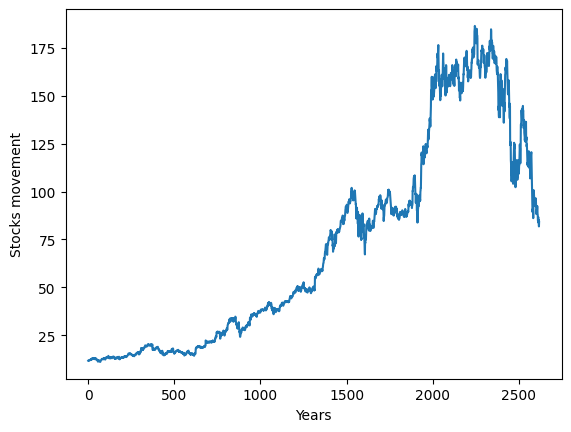

In [7]:
df_4_AC=df_4['Adj Close']
plt.ylabel('Stocks movement')
plt.xlabel('Years')
plt.plot(df_4_AC)